In [143]:
import pandas as pd
import numpy as np
import torch

In [144]:
train = pd.read_csv('https://raw.githubusercontent.com/DengyiLiu/Deep-Learning-05/main/train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [145]:
df_test = pd.read_csv('https://raw.githubusercontent.com/DengyiLiu/Deep-Learning-05/main/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


In [146]:
test = df_test[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']].copy()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [148]:
modes = train.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [149]:
train.fillna(modes, inplace=True)

In [150]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [151]:
train.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


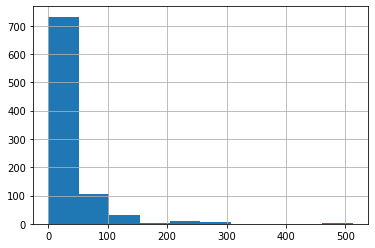

In [152]:
train['Fare'].hist()

In [153]:
train['logFare'] = np.log(train['Fare']+1)

Log(0) is nan so + 1

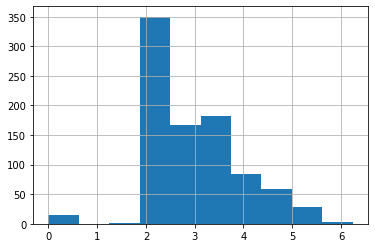

In [154]:
train['logFare'].hist()

In [155]:
pclasses = sorted(train.Pclass.unique())
pclasses

[1, 2, 3]

In [156]:
train.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


Create Dummy varaibles

In [157]:
train = pd.get_dummies(train, columns=["Sex","Pclass","Embarked"])
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'logFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [158]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,logFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


In [159]:
from torch import tensor

In [160]:
t_dep = tensor(train.Survived) #tensor/array/vector/matrix

In [161]:
indep_cols = ['Age','SibSp','Parch','logFare','Sex_male','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']

t_indep = tensor(train[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [162]:
t_indep.shape

torch.Size([891, 12])

In [163]:
len(t_indep.shape)#the len of the tensor is the rank(algebra knowledge:num of rank =num of Maximum linearly independent group)

2

# Setting up a linear model

In [164]:
torch.manual_seed(422)
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.2020, -0.1287,  0.0531, -0.1543, -0.4534, -0.3952, -0.1071,  0.2316,
         0.4959, -0.4638, -0.0450,  0.4065])

In [165]:
t_indep*coeffs

tensor([[-4.4443, -0.1287,  0.0000,  ..., -0.0000, -0.0000,  0.4065],
        [-7.6765, -0.1287,  0.0000,  ..., -0.4638, -0.0000,  0.0000],
        [-5.2524, -0.0000,  0.0000,  ..., -0.0000, -0.0000,  0.4065],
        ...,
        [-4.8483, -0.1287,  0.1062,  ..., -0.0000, -0.0000,  0.4065],
        [-5.2524, -0.0000,  0.0000,  ..., -0.4638, -0.0000,  0.0000],
        [-6.4645, -0.0000,  0.0000,  ..., -0.0000, -0.0450,  0.0000]])

In [166]:
preds = (t_indep*coeffs).sum(axis=1)

In [167]:
preds[:10]

tensor([ -4.4498,  -9.4321,  -5.0830,  -7.9110,  -6.9615,  -5.1977, -11.6752,
         -0.7658,  -5.2262,  -4.1147])

The coefficient of age is too high so we need to do some process.

In [168]:
vals, indices = t_indep.max(dim=0)#dim=0 means the maximum of the rows
t_indep = t_indep/vals#normalized

In [169]:
t_indep*coeffs

tensor([[-0.0556, -0.0161,  0.0000,  ..., -0.0000, -0.0000,  0.4065],
        [-0.0960, -0.0161,  0.0000,  ..., -0.4638, -0.0000,  0.0000],
        [-0.0657, -0.0000,  0.0000,  ..., -0.0000, -0.0000,  0.4065],
        ...,
        [-0.0606, -0.0161,  0.0177,  ..., -0.0000, -0.0000,  0.4065],
        [-0.0657, -0.0000,  0.0000,  ..., -0.4638, -0.0000,  0.0000],
        [-0.0808, -0.0000,  0.0000,  ..., -0.0000, -0.0450,  0.0000]])

In [170]:
preds = (t_indep*coeffs).sum(axis=1)

In [171]:
preds[:10]

tensor([ 0.3251, -1.1840,  0.3874, -0.2989,  0.3061, -0.1187, -0.3885,  0.3280,
         0.3950, -0.7638])

In [172]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.6845)

In [173]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

# Doing a gradient descent step

In [174]:
coeffs.requires_grad_()#the coeffs changes each time run this code.

tensor([-0.2020, -0.1287,  0.0531, -0.1543, -0.4534, -0.3952, -0.1071,  0.2316,
         0.4959, -0.4638, -0.0450,  0.4065], requires_grad=True)

In [175]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.6845, grad_fn=<MeanBackward0>)

In [176]:
loss.backward()

In [177]:
coeffs.grad

tensor([-0.0954, -0.0003, -0.0142, -0.1541,  0.0079, -0.2155, -0.2424, -0.0561,
         0.0909, -0.1886, -0.0864,  0.0673])

Try different learning rate and see the difference of loss.

In [178]:
with torch.no_grad():
  coeffs.sub_(coeffs.grad * 0.01)#set learning rate as 0.01
  print(calc_loss(coeffs, t_indep, t_dep))                

tensor(0.6826)


# Training the linear model

In [179]:
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
from fastai.data.transforms import RandomSplitter
train_split,val_split=RandomSplitter(seed=42)(train)

In [181]:
train_indep,val_indep = t_indep[train_split],t_indep[val_split]
train_dep,val_dep = t_dep[train_split],t_dep[val_split]
len(train_indep),len(val_indep)

(713, 178)

# Define function to do above things

In [182]:
def update_coeffs(coeffs, learning_rate): coeffs.sub_(coeffs.grad * learning_rate)

In [183]:
def one_epoch(coeffs, learning_rate):
  loss = calc_loss(coeffs, train_indep, train_dep)
  loss.backward()
  with torch.no_grad(): update_coeffs(coeffs, learning_rate)
  print(f"{loss:.3f}", end="; ")

In [184]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [185]:
def train_model(epoches=30, learning_rate = 0.01):
  torch.manual_seed(442)
  coeffs = init_coeffs()
  for i in range(epoches): one_epoch(coeffs, learning_rate= learning_rate)
  return coeffs

In [186]:
coeffs = train_model(25, learning_rate = 0.01)#we can see the loss going down.

0.536; 0.534; 0.530; 0.525; 0.518; 0.510; 0.501; 0.492; 0.483; 0.474; 0.466; 0.455; 0.440; 0.421; 0.402; 0.385; 0.369; 0.356; 0.344; 0.332; 0.320; 0.308; 0.298; 0.293; 0.293; 

In [187]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2410),
 'SibSp': tensor(0.1040),
 'Parch': tensor(0.2532),
 'logFare': tensor(0.0949),
 'Sex_male': tensor(-0.4087),
 'Sex_female': tensor(0.3052),
 'Pclass_1': tensor(0.8516),
 'Pclass_2': tensor(0.4169),
 'Pclass_3': tensor(0.2869),
 'Embarked_C': tensor(0.1580),
 'Embarked_Q': tensor(0.3208),
 'Embarked_S': tensor(0.1293)}

# Measuring accuracy

In [188]:
preds = calc_preds(coeffs, val_indep)

In [189]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False])

In [190]:
results.float().mean()

tensor(0.7921)

Create a function to realize the above codes

In [191]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7921)

# Using sigmoid 

In [192]:
preds[:30]

tensor([ 1.0100,  0.1596, -0.0041,  0.1488,  0.1023,  0.0950,  0.8209,  0.8072,
         0.2128,  0.7809, -0.0556,  0.0615,  0.0886,  0.8738, -0.0643,  0.4871,
         0.4268,  0.8684,  0.0701,  0.6626, -0.0316,  0.4539,  1.3243,  0.8679,
        -0.0210,  0.1887,  0.8116,  0.4358, -0.0092,  0.8736])

To squish everything between zero and one.

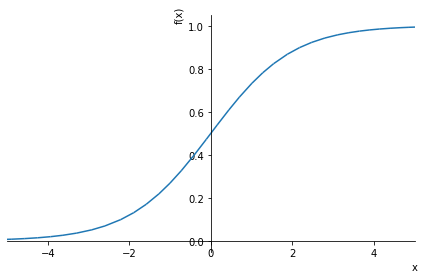

In [193]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5))# show the sigmoid function

In [194]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [195]:
coeffs = train_model(learning_rate=5)

0.510; 0.412; 0.325; 0.290; 0.257; 0.228; 0.212; 0.206; 0.204; 0.204; 0.204; 0.205; 0.205; 0.205; 0.204; 0.203; 0.202; 0.200; 0.198; 0.196; 0.194; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [196]:
acc(coeffs)

tensor(0.8258)

In [197]:
show_coeffs()

{'Age': tensor(-2.7380),
 'SibSp': tensor(-2.9913),
 'Parch': tensor(-0.9914),
 'logFare': tensor(2.8052),
 'Sex_male': tensor(-30.8688),
 'Sex_female': tensor(26.2855),
 'Pclass_1': tensor(12.9063),
 'Pclass_2': tensor(7.0062),
 'Pclass_3': tensor(-22.8368),
 'Embarked_C': tensor(5.7289),
 'Embarked_Q': tensor(1.9908),
 'Embarked_S': tensor(-11.5914)}

In [198]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [199]:
test['Fare'] = test.Fare.fillna(0)

In [200]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
test['Fare'] = test.Fare.fillna(0)

In [202]:
test.fillna(modes, inplace=True)
test['logFare'] = np.log(test['Fare']+1)
test = pd.get_dummies(test, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(test[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [203]:
test['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [204]:
sub_df = test[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [205]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [206]:
val_indep@coeffs

tensor([ 35.6259, -51.5619, -47.8508, -34.1324, -35.1234, -35.6022,  10.0748,
         21.9282, -65.7922,   9.2333, -65.4084, -48.0842, -64.8512,   5.5996,
        -65.5553, -29.6036, -30.2880,  22.1608, -35.3074,  -8.1833, -65.1361,
        -29.9800,  45.1671,  21.2363, -65.0441, -51.4606,  -7.5943, -30.1854,
        -64.8594,   5.5930,  21.9400,  -9.1513, -64.9650, -65.3508,  35.4206,
         -8.4757, -29.5642,  46.0108, -65.1284,  -8.3885, -35.0065, -65.1284,
        -35.5523,  45.7796, -64.9915,  -8.7064, -64.3657, -65.2690, -51.6044,
         -7.9472, -16.1979, -66.0660, -65.8680, -65.2152, -35.2461, -35.4514,
        -51.5613, -65.6416, -65.0257, -64.9964, -11.7507, -65.3151, -30.7484,
        -65.0319,  21.3019, -28.4780, -35.0892, -65.1823, -52.3629,  21.3621,
        -65.2045,   9.2787, -35.4172, -65.0616, -28.8952, -64.8684, -65.1284,
        -29.2008, -34.9181, -35.8163, -34.7432,  45.6289, -65.1019, -65.1700,
         21.0868, -18.0075, -11.1112,  28.5724,  39.1352, -35.05

In [207]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In order to do matrix-matrix products (which we'll need in the next section), we need to turn coeffs into a column vector (i.e. a matrix with a single column), which we can do by passing a second argument 1 to torch.rand(), indicating that we want our coefficients to have one column:

In [208]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [209]:
val_dep = val_dep[:,None]

In [210]:
train_dep = train_dep[:,None]

In [211]:
len(train_indep),len(val_indep)

(713, 178)

In [212]:
coeffs = train_model(learning_rate=5)

0.512; 0.411; 0.315; 0.281; 0.253; 0.227; 0.211; 0.205; 0.203; 0.202; 0.203; 0.203; 0.203; 0.203; 0.203; 0.202; 0.200; 0.198; 0.196; 0.195; 0.194; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [213]:
acc(coeffs)

tensor(0.8258)

In [220]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.5 # this number need to be checked 
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [214]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [216]:
def update_coeffs(coeffs, learning_rate):
    for layer in coeffs:
        layer.sub_(layer.grad * learning_rate)
        layer.grad.zero_()

In [223]:
coeffs = train_model(learning_rate=3)

0.542; 0.496; 0.422; 0.348; 0.314; 0.290; 0.273; 0.259; 0.249; 0.240; 0.233; 0.228; 0.225; 0.222; 0.220; 0.218; 0.216; 0.214; 0.213; 0.212; 0.210; 0.209; 0.208; 0.208; 0.207; 0.206; 0.205; 0.205; 0.204; 0.203; 

In [225]:
coeffs = train_model(learning_rate=20)

0.542; 0.334; 0.238; 0.215; 0.210; 0.218; 0.209; 0.200; 0.201; 0.202; 0.205; 0.197; 0.194; 0.194; 0.194; 0.194; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 

In [226]:
acc(coeffs)

tensor(0.8258)

# Deep learning

In [227]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [228]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [229]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [230]:
coeffs = train_model(learning_rate=4)

0.521; 0.483; 0.427; 0.379; 0.379; 0.379; 0.379; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.378; 0.377; 0.376; 0.371; 0.333; 0.239; 0.224; 0.208; 0.204; 0.203; 0.203; 0.207; 0.197; 0.196; 0.195; 

In [231]:
acc(coeffs)

tensor(0.8258)